In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import operator
%matplotlib inline  

In [17]:
tdata = pd.read_csv('text_features.csv', sep='\t')

In [18]:
tdata.columns

Index(['Unnamed: 0', 'OUTPUT:person_character_word',
       'OUTPUT:person_appearance_word', 'OUTPUT:person_description_text',
       'OUTPUT:person_communication_word', 'OUTPUT:person_individuality_word',
       'OUTPUT:self_gift_link'],
      dtype='object')

In [19]:
tdata = tdata.drop('Unnamed: 0', axis=1)

In [20]:
tdata.head(5)

,OUTPUT:person_character_word,OUTPUT:person_appearance_word,OUTPUT:person_description_text,OUTPUT:person_communication_word,OUTPUT:person_individuality_word,OUTPUT:self_gift_link
0,уравновешенный,приятная,"чистоплотный, организованный, ответственный, п...",приятное,порядочный,NaN
1,Весельчак.,Приятный.,"Неусидчивый, очень легко отвлекается и увлекае...",Ненавязчивое.,Наивный стяжатель.,NaN
2,реалист,миловидная,"Ум, скромность, честность, привлекательность, ...",приятное,ответственность,NaN
3,Веселая,Красивая,Немного наивная верит в любовь с первого взгля...,Легко,Уникальность,https://sunlight.net/catalog/neck_decoration_5...
4,спокойный,красавчик,лучшая\tлегкая\tмилая\tмечтательная манящая ми...,любовное,характер,https://www.apple.com/ru/


In [21]:
tdata = tdata.drop('OUTPUT:self_gift_link', axis=1)

In [22]:
tdata.head(5)

,OUTPUT:person_character_word,OUTPUT:person_appearance_word,OUTPUT:person_description_text,OUTPUT:person_communication_word,OUTPUT:person_individuality_word
0,уравновешенный,приятная,"чистоплотный, организованный, ответственный, п...",приятное,порядочный
1,Весельчак.,Приятный.,"Неусидчивый, очень легко отвлекается и увлекае...",Ненавязчивое.,Наивный стяжатель.
2,реалист,миловидная,"Ум, скромность, честность, привлекательность, ...",приятное,ответственность
3,Веселая,Красивая,Немного наивная верит в любовь с первого взгля...,Легко,Уникальность
4,спокойный,красавчик,лучшая\tлегкая\tмилая\tмечтательная манящая ми...,любовное,характер


In [23]:
res = []
for idx, row in tdata.iterrows():
    s = ""
    for col in tdata.columns:
        s += row[col].lower() + ' '
    s = s.replace(',', '')
    s = s.replace('  ', '')
    res.append(s)
res    

['уравновешенный приятная чистоплотный организованный ответственный пунктуальный всегда доводит начатое дело до конца любящий природу приятное порядочный ',
 'весельчак. приятный. неусидчивый очень легко отвлекается и увлекается. всегда можно направить его в нужное русло. совсем не держит слово но очень верит в то что может. никогда не обижается. цепкий как репей. ненавязчивое. наивный стяжатель. ',
 'реалист миловидная ум скромность честность привлекательность обаяние напористость строгость справедливость отзывчивость пунктуальность доброта. приятное ответственность ',
 'веселая красивая немного наивная верит в любовь с первого взгляда любит дурачиться плакса иногда очень взрослая ведет себя серьезно иногда как дите малое любит цветы и яркие краски образы неуклюжая умеет готовить но не любит легко уникальность ',
 'спокойный красавчик лучшая\tлегкая\tмилая\tмечтательная манящая миниатюрная нежная неповторимая незабываемая неотразимая невообразимая непредсказуемая непосредственная нена

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dmitriy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
tokenizer = RegexpTokenizer(r'\w+')

ru_stop = stopwords.words('russian')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

# compile sample documents into a list
doc_set = res

# list for tokenized documents in loop
texts = []
token_counts = {}
sum_counts = 0
docs_tokens = []
# loop through document list
for idx in range(len(doc_set)):
    # clean and tokenize document string
    raw = doc_set[idx].lower()
    tokens = tokenizer.tokenize(raw)
    # уборка частых слов уже после токенизации осознанна
    for elem in tokens:
        if elem in token_counts:
            token_counts[elem] += 1
        else:
            token_counts[elem] = 1
        sum_counts += 1
    docs_tokens.append(tokens)

sorted_counts = sorted(token_counts.items(), key=operator.itemgetter(1))
#sorted_counts.reverse()

summator = 0
sum_counts_fl = float(sum_counts)
for idx in range(len(sorted_counts)):
    if summator / sum_counts_fl < float(0.4): # отсеиваемая доля
        summator += sorted_counts[idx][1]
        ru_stop.append(sorted_counts[idx][0])
    else:
        break 

for idx in range(len(doc_set)):
    tokens = docs_tokens[idx]
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in ru_stop]
    # stem tokens
    #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    # add tokens to list
    texts.append(stopped_tokens)

In [116]:
texts

[['уравновешенный',
  'приятная',
  'ответственный',
  'пунктуальный',
  'доводит',
  'конца',
  'любящий',
  'природу',
  'приятное',
  'порядочный'],
 ['приятный', 'очень', 'легко', 'увлекается', 'держит', 'очень'],
 ['реалист',
  'ум',
  'честность',
  'справедливость',
  'отзывчивость',
  'доброта',
  'приятное',
  'ответственность'],
 ['веселая',
  'красивая',
  'немного',
  'любовь',
  'любит',
  'очень',
  'любит',
  'цветы',
  'умеет',
  'готовить',
  'любит',
  'легко'],
 ['спокойный',
  'красавчик',
  'лучшая',
  'милая',
  'мечтательная',
  'манящая',
  'миниатюрная',
  'нежная',
  'неповторимая',
  'непредсказуемая',
  'ненаглядная',
  'отзывчивая',
  'обворожительная',
  'характер'],
 ['общительный',
  'внешности',
  'занимается',
  'правильный',
  'жизни',
  'любит',
  'животных',
  'любит',
  'смотреть',
  'фильмы',
  'животных',
  'легко',
  'часто',
  'пытается'],
 ['упрямый',
  'высокий',
  'добрый',
  'немного',
  'вспыльчивый',
  'отзывчивый',
  'упрямый',
  'трудол

In [117]:
words = []
for elem in texts:
    for w in elem:
        words.append(w)
words=np.array(words)

In [118]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

for word in words:
    p = morph.parse(word)[0]
    print(p.normal_form)

уравновесить
приятный
ответственный
пунктуальный
доводить
конец
любящий
природа
приятный
порядочный
приятный
очень
легко
увлекаться
держать
очень
реалист
ум
честность
справедливость
отзывчивость
доброта
приятный
ответственность
весёлый
красивый
немного
любовь
любить
очень
любить
цвета
уметь
готовить
любить
легко
спокойный
красавчик
хороший
милый
мечтательный
манящий
миниатюрный
нежный
неповторимый
непредсказуемый
ненаглядный
отзывчивый
обворожительный
характер
общительный
внешность
заниматься
правильный
жизнь
любить
животное
любить
смотреть
фильм
животное
легко
часто
пытаться
упрямый
высокий
добрый
немного
вспыльчивый
отзывчивый
упрямый
трудолюбивый
очень
любить
работать
хотеть
сделать
множество
свой
рука
уметь
либо
делать
очень
талантливый
человек
работать
ценить
разбираться
заниматься
хобби
любить
человек
жизнь
стараться
человек
человек
однако
сильно
тёплый
мысль
воспитанный
добрый
решительный
адекватный
мужественный
любознательный
вспыльчивый
симпотичный
добросовестный
надёжный
горд

разносторонний
разносторонний
симпатичный
девушка
ответственный
человек
весёлый
умный
добрый
улыбчивый
немного
красивый
смелый
весело
надёжный
сильный
привлекательный
смелый
сильный
общительный
привлекательный
новый
часто
хотя
любить
очень
любить
играть
компания
жизнь
добрый
любимый
общительный
тяжёлый
привлекательный
мужчина
хороший
чувство
юмор
абсолютно
жизнь
очень
аккуратный
пунктуальный
человек
хороший
семьянин
очень
любить
ребёнок
жить
готовый
помочь
стремиться
очень
работать
муж
симпатичный
симпатичный
образовать
умный
увлекаться
весь
хороший
честный
добрый
приятный
заботливый
добрый
самый
любимый
дорогой
человек
весь
бывать
человек
свет
близкий
забота
глаз
высокий
взгляд
внимательный
стройный
позитивный
красивый
очень
эгоист
очень
заботливый
творческий
очень
приятный
жизнерадостный
весёлый
стремиться
окружающий
очень
любить
путешествовать
весь
решительный
красивый
жизнерадостный
любить
стремиться
цель
интересно
симпатичный
мысль
делать
думать
быстро
принимать
симпатичный
внешно

чуткий
улыбка
лучезарный
упрямый
сексуальный
открытый
мама
очень
хороший
отзывчивый
дать
совет
разбираться
любить
отличный
упрямый
красивый
помощь
весёлый
любить
трудолюбивый
немного
бывать
искренний
приятный
внимательный
спокойный
красавица
молодая
девушка
постоянно
сидеть
путешествие
дом
хороший
подарок
любовь
отзывчивый
приятный
отзывчивый
хороший
хозяйка
открытый
интересный
личность
любить
делать
подарок
стремиться
новый
работа
умный
готовый
спорт
часто
учиться
свободный
время
рисовать
время
характер
привлекательный
харизматичный
обаятельный
воспитанный
чувство
чувство
юмор
надёжный
друг
талантливый
уметь
цель
очень
трудолюбивый
любить
общение
человек
стараться
помочь
иметь
заниматься
помочь
человек
красавчик
добрый
ласковый
отзывчивый
смешной
симпатичный
позитивный
хороший
активный
спокойный
привлекательный
умный
практичный
спокойный
надёжный
самостоятельный
часто
понимание
надёжность
привлекательный
симпатичный
добрый
отзывчивый
немного
ребёнок
надёжный
сложно
хороший
красивый
че

внимательный
ласковый
уравновесить
душить
компания
уверенный
муж
немного
симпатичный
очень
очень
быстро
находить
делать
очень
отзывчивый
хороший
родной
человек
хотеться
дарить
дарить
подарок
это
мама
подарок
свой
жизнь
мама
упереть
добрый
отзывчивый
ласковый
красивый
умный
щедрый
весёлый
яркий
хороший
отец
внимательный
муж
заботливый
ответственный
работник
радость
серьёзный
симпатичный
красивый
добрый
заботливый
немного
хороший
чувство
юмор
позитивный
любовь
харизма
мягкий
симпатичный
добрый
красивый
искренний
доброта
спокойный
добрый
отзывчивый
добрый
начитанный
приятный
общение
умный
работать
любить
путешествие
оптимист
привлекательный
красота
умение
слушать
приятный
открытый
приятный
оптимист
щедрый
открытый
практичный
мудрый
компанейский
ответственный
спокойный
заботливый
человек
слово
вежливый
гостеприимный
уравновесить
привлекательный
иметь
свой
мнение
уметь
бояться
каждый
день
что
учиться
позитивный
приятно
общаться
смелый
умный
уравновесить
доброжелательный
активный
любознатель

иметь
цель
сам
легко
любить
жизнь
готовый
часто
делать
доброта
дружелюбный
открытый
часто
бывать
очень
активный
любить
что
новый
лёгкое
харизматичный
симпатичный
симпатичный
жизнерадостный
общительный
хозяйственный
вкусно
готовить
красавица
весёлый
общение
открытый
очень
дружелюбный
компания
общение
любить
особенно
сильно
интересный
сложный
упрямый
думать
любитель
любить
любить
добрый
красивый
добрый
ответственный
заботливый
помощь
характер
спокойный
красивый
прагматичный
ответственный
любящий
среднее
рост
мужчина
год
интересный
жена
красавица
разбираться
поддерживать
хороший
отношение
друг
любить
разный
тема
любовь
красивый
яркий
активный
уверенный
любить
романтичный
лёгкий
общение
сильный
обаятельный
красивый
хороший
общительный
красавица
любить
бывать
трудно
очень
хороший
характер
красивый
девушка
человек
очень
хороший
приятно
общаться
также
поддержать
люба
момент
также
очень
красивый
умный
помочь
также
очень
вкусно
готовить
очень
обаятельный
позитивный
щедрый
добрый
любить
кошка
он

внешность
активный
доброжелательный
активный
общение
интеллигентный
цель
жизнь
любитель
разговорчивый
лёгкость
красивый
добрый
хороший
ответственный
весёлый
любящий
просто
замечательный
трудоголик
умный
хозяйственный
очень
любить
порядок
дом
вкусно
готовить
умение
упрямый
красивый
упрямый
сильный
высокий
умный
целеустремлённый
любить
животное
дружелюбный
молодая
весёлый
тёплый
добрый
милый
добрый
милый
девушка
приятный
общение
доверчивый
нежный
спокойный
трудолюбивый
терпеливый
любящий
скромный
привлекательный
симпатичный
открытый
умный
приятный
симпатичный
спокойный
красивый
тяжёлый
человек
доверять
человек
держать
очень
добрый
ранимый
пытаться
весь
помочь
человек
это
близкие
человек
хотеться
это
делать
время
твёрдый
интересный
энергичный
внимание
доводить
конец
общительный
жизнерадостный
готовый
помочь
трудный
минута
отличный
трудолюбивый
весёлый
красивый
весёлый
добрый
хороший
мама
самый
подруга
эмоциональный
общительный
друг
близкий
знать
уравновесить
обычный
трудолюбивый
надёжный


нормальный
добрый
весёлый
это
который
очень
любить
весёлый
общительный
это
радость
правильный
красивый
красивый
добрый
общительный
приятный
энергичный
вежливый
пунктуальный
умный
весёлый
приятный
красивый
милый
сложный
характер
общий
язык
постоянно
любить
животное
сложно
очень
эмоциональный
человек
очень
любить
отношение
отзывчивый
красивый
добрый
умный
ответственный
мужественный
близкие
коммуникабельный
верный
друг
хороший
отец
лёгкий
симпатичный
симпатичный
упрямый
вспыльчивый
милый
реалист
вспыльчивый
общительный
реалист
непредсказуемый
красивый
весёлый
любить
собака
любить
любить
человек
приятный
харизматичный
неординарный
жизнерадостный
романтичный
характер
красивый
высокий
родной
лёгкое
общительный
приятный
добрый
отзывчивый
заботливый
вкусно
готовить
общительный
дружеский
приятный
надёжный
добрый
отзывчивый
любящий
мера
прагматичный
любитель
харизма
симпатичный
любить
хотеть
доверять
человек
часто
жизнь
считать
друг
бывать
жить
друг
нужно
человек
добрый
готовый
сделать
очень
люб

интересный
харизма
отзывчивый
приятный
умный
приятный
честный
весёлый
заботливый
аккуратный
надёжный
романтичный
открытый
спокойный
целеустремлённый
яркий
любящий
приятный
симпатичный
умный
целеустремлённый
оптимист
добрый
общительный
иметь
любить
животное
часто
свой
близкий
красивый
легко
весёлый
спокойный
добрый
честный
любить
человек
добрый
красивый
добрый
отзывчивый
общительный
любящий
жизнерадостный
целеустремлённый
доверительный
настойчивость
любить
новое
хотеть
постоянно
идти
любить
животное
сложно
свой
любить
путешествовать
любить
спорт
любить
работа
обожать
особенно
отлично
весёлый
добрый
любить
любить
любить
слушать
музыка
поддержать
трудный
минута
радость
добрый
приятный
добрый
справедливый
вспыльчивый
азартный
тёплый
справедливый
добрый
красивый
человек
который
прийти
помощь
трудный
минута
помочь
простой
честный
симпатичный
умный
скромный
общительный
упрямый
сильный
симпатичный
прийти
характер
близкий
верный
дружелюбный
ответственный
женщина
поддержать
трудный
минута
прийти

In [119]:
for word in words:
    print(word, [p.normal_form for p in morph.parse(word)])

уравновешенный ['уравновесить', 'уравновесить']
приятная ['приятный']
ответственный ['ответственный', 'ответственный']
пунктуальный ['пунктуальный', 'пунктуальный']
доводит ['доводить', 'доводить']
конца ['конец']
любящий ['любящий', 'любящий', 'любить', 'любить']
природу ['природа']
приятное ['приятный', 'приятный']
порядочный ['порядочный', 'порядочный']
приятный ['приятный', 'приятный']
очень ['очень']
легко ['легко', 'лёгкий']
увлекается ['увлекаться']
держит ['держать']
очень ['очень']
реалист ['реалист']
ум ['ум', 'ум', 'умереть', 'умереть']
честность ['честность', 'честность']
справедливость ['справедливость', 'справедливость']
отзывчивость ['отзывчивость', 'отзывчивость']
доброта ['доброта']
приятное ['приятный', 'приятный']
ответственность ['ответственность', 'ответственность']
веселая ['весёлый']
красивая ['красивый']
немного ['немного', 'немного', 'немного']
любовь ['любовь', 'любовь', 'любовь', 'любовь']
любит ['любить']
очень ['очень']
любит ['любить']
цветы ['цвета', 'цве

симпатичный ['симпатичный', 'симпатичный']
близких ['близкие', 'близкие', 'близкие', 'близкий', 'близкий', 'близкий']
хорошим ['хороший', 'хороший', 'хороший']
чувством ['чувство']
юмора ['юмор']
ума ['ум']
трудолюбив ['трудолюбивый']
замечательный ['замечательный', 'замечательный']
собеседник ['собеседник']
очень ['очень']
интересный ['интересный', 'интересный']
человек ['человек', 'человек']
хороший ['хороший', 'хороший']
красивая ['красивый']
лицо ['лицо', 'лицо', 'лицо', 'лицо']
темные ['тёмный', 'тёмный']
глаза ['глаз', 'глаз', 'глаз']
друг ['друг']
поэтому ['поэтому']
длинные ['длинный', 'длинный']
считает ['считать', 'считать']
это ['это', 'это', 'это', 'этот', 'этот']
характера ['характер']
добрый ['добрый', 'добрый']
отзывчивый ['отзывчивый', 'отзывчивый']
уважает ['уважать']
хорошее ['хороший', 'хороший']
общение ['общение', 'общение']
красавица ['красавица']
красивая ['красивый']
умная ['умный']
заботливая ['заботливый']
привлекательная ['привлекательный']
сексуальная ['секс

надежность ['надёжность', 'надёжность']
забота ['забота']
чувство ['чувство', 'чувство']
юмора ['юмор']
любовь ['любовь', 'любовь', 'любовь', 'любовь']
характера ['характер']
любовь ['любовь', 'любовь', 'любовь', 'любовь']
забота ['забота']
доброта ['доброта']
ответственная ['ответственный']
привлекательная ['привлекательный']
ответственная ['ответственный']
порядочная ['порядочный']
привлекательная ['привлекательный']
внимательная ['внимательный']
любящая ['любящий', 'любить']
детей ['ребёнок', 'ребёнок']
природу ['природа']
животных ['животное', 'животный', 'животный', 'животный', 'животное', 'животное']
любит ['любить']
цветы ['цвета', 'цвета', 'цветок', 'цветок']
заботится ['заботиться']
нормальное ['нормальный', 'нормальный']
порядочная ['порядочный']
общении ['общение']
имеет ['иметь']
зрения ['зрение', 'зрение', 'зрение']
легкий ['лёгкий', 'лёгкий']
подъем ['подъесть', 'подъём', 'подъём']
готовый ['готовый', 'готовый']
прийти ['прийти']
помощь ['помощь', 'помощь']
умеет ['уметь'

добрый ['добрый', 'добрый']
веселый ['весёлый', 'весёлый']
очень ['очень']
общительный ['общительный', 'общительный']
человек ['человек', 'человек']
который ['который', 'который']
работает ['работать']
очень ['очень']
отзывчивый ['отзывчивый', 'отзывчивый']
очень ['очень']
добрый ['добрый', 'добрый']
любит ['любить']
новое ['новое', 'новое', 'новый', 'новый']
знает ['знать']
работает ['работать']
нужно ['нужно', 'нужный']
милая ['милый']
красивая ['красивый']
спортивная ['спортивный']
общительная ['общительный']
обворожительная ['обворожительный']
красивый ['красивый', 'красивый']
любимый ['любимый', 'любимый', 'любить', 'любить']
муж ['муж', 'муж']
любящий ['любящий', 'любящий', 'любить', 'любить']
папа ['папа']
очень ['очень']
любит ['любить']
спорт ['спорт', 'спорт']
свободное ['свободный', 'свободный']
время ['время', 'время']
любит ['любить']
играть ['играть']
компьютерные ['компьютерный', 'компьютерный']
игры ['игра', 'игра', 'игра']
слушать ['слушать']
музыку ['музыка']
играть [

слова ['слово', 'слово', 'слово']
оптимист ['оптимист']
твердый ['твёрдый', 'твёрдый']
надежный ['надёжный', 'надёжный']
ответственный ['ответственный', 'ответственный']
спокойный ['спокойный', 'спокойный']
заботливый ['заботливый', 'заботливый']
приятное ['приятный', 'приятный']
красота ['красота']
работе ['работа', 'работа']
хорошим ['хороший', 'хороший', 'хороший']
чувством ['чувство']
юмора ['юмор']
терпит ['терпеть']
волосы ['волос', 'волос']
моей ['мой', 'мой', 'мой', 'мой']
темные ['тёмный', 'тёмный']
волосы ['волос', 'волос']
волосы ['волос', 'волос']
стройная ['стройный']
сидит ['сидеть']
стройная ['стройный']
особенно ['особенно', 'особенно', 'особенный']
это ['это', 'это', 'это', 'этот', 'этот']
делает ['делать']
внешность ['внешность', 'внешность']
сдержанный ['сдержать', 'сдержать', 'сдержанный', 'сдержанный']
приятная ['приятный']
человек ['человек', 'человек']
очень ['очень']
разносторонний ['разносторонний', 'разносторонний']
свои ['свой', 'свой']
помочь ['помочь', 'пом

путешествия ['путешествие', 'путешествие', 'путешествие']
очень ['очень']
активный ['активный', 'активный']
жизни ['жизнь', 'жизнь', 'жизнь', 'жизнь', 'жизнь']
которой ['который', 'который', 'который', 'который']
добрый ['добрый', 'добрый']
любит ['любить']
детей ['ребёнок', 'ребёнок']
животных ['животное', 'животный', 'животный', 'животный', 'животное', 'животное']
общительный ['общительный', 'общительный']
новым ['новый', 'новое', 'новое', 'новый', 'новый']
близкое ['близкий', 'близкий']
трудоголик ['трудоголик']
открытый ['открытый', 'открытый', 'открыть', 'открыть']
доверчивый ['доверчивый', 'доверчивый']
милая ['милый']
добрый ['добрый', 'добрый']
отзывчивый ['отзывчивый', 'отзывчивый']
заботливый ['заботливый', 'заботливый']
внимательный ['внимательный', 'внимательный']
открытый ['открытый', 'открытый', 'открыть', 'открыть']
доверчивый ['доверчивый', 'доверчивый']
ласковый ['ласковый', 'ласковый']
легкий ['лёгкий', 'лёгкий']
образованный ['образовать', 'образовать', 'образовать',

ответственный ['ответственный', 'ответственный']
замечательный ['замечательный', 'замечательный']
приятное ['приятный', 'приятный']
прагматичный ['прагматичный', 'прагматичный']
умный ['умный', 'умный']
парень ['парень']
друг ['друг']
замечательный ['замечательный', 'замечательный']
добрый ['добрый', 'добрый']
отзывчивый ['отзывчивый', 'отзывчивый']
человек ['человек', 'человек']
любит ['любить']
сдержанность ['сдержанность', 'сдержанность']
милая ['милый']
это ['это', 'это', 'это', 'этот', 'этот']
дочь ['дочь', 'дочь']
которая ['который']
учится ['учиться']
делает ['делать']
умная ['умный']
ласковая ['ласковый']
понимающая ['понимать']
друзей ['друг', 'друг']
которые ['который', 'который']
приятное ['приятный', 'приятный']
милая ['милый']
вредная ['вредный']
упрямая ['упрямый']
добрая ['добрый']
застенчивая ['застенчивый']
ранимая ['ранимый', 'ранить']
немного ['немного', 'немного', 'немного']
приятное ['приятный', 'приятный']
добрый ['добрый', 'добрый']
добрый ['добрый', 'добрый']
от

людьми ['человек']
идет ['идти']
добрый ['добрый', 'добрый']
очень ['очень']
щедрый ['щедрый', 'щедрый']
сильный ['сильный', 'сильный']
людям ['человек']
любит ['любить']
детей ['ребёнок', 'ребёнок']
вкусно ['вкусно', 'вкусный']
готовит ['готовить']
просто ['просто', 'просто', 'простой']
душевный ['душевный', 'душевный']
человек ['человек', 'человек']
немного ['немного', 'немного', 'немного']
хороший ['хороший', 'хороший']
весело ['весело', 'весёлый']
простой ['простой', 'простой', 'простоять', 'простой', 'простой', 'простой', 'простой', 'простой', 'простой']
ранимый ['ранимый', 'ранимый', 'ранить', 'ранить']
прекрасная ['прекрасный']
человек ['человек', 'человек']
близкий ['близкий', 'близкий']
очень ['очень']
хорошая ['хороший']
добрая ['добрый']
людьми ['человек']
однако ['однако', 'однако']
доверие ['доверие', 'доверие']
хорошим ['хороший', 'хороший', 'хороший']
близким ['близкие', 'близкий', 'близкий', 'близкий']
девушка ['девушка']
которые ['который', 'который']
деньги ['деньга',

умный ['умный', 'умный']
доброта ['доброта']
добрая ['добрый']
чуткая ['чуткий']
добрая ['добрый']
любимая ['любимый', 'любить']
умная ['умный']
прекрасная ['прекрасный']
красивая ['красивый']
поможет ['помочь']
чуткая ['чуткий']
спокойный ['спокойный', 'спокойный']
симпотичный ['симпотичный', 'симпотичный']
разные ['разный', 'разный']
любит ['любить']
музыку ['музыка']
долго ['долго', 'долгий']
интересно ['интересно', 'интересный']
слушать ['слушать']
имеет ['иметь']
занимается ['заниматься']
лет ['год', 'лёт', 'лёт']
знакомых ['знакомый', 'знакомый', 'знакомый']
курит ['курить']
любит ['любить']
животных ['животное', 'животный', 'животный', 'животный', 'животное', 'животное']
собак ['собака', 'собака']
животных ['животное', 'животный', 'животный', 'животный', 'животное', 'животное']
времени ['время', 'время', 'время', 'временить']
очень ['очень']
хорошие ['хороший', 'хороший']
отношения ['отношение', 'отношение', 'отношение']
знакомы ['знакомый']
очень ['очень']
вспыльчивый ['вспыльч

хороший ['хороший', 'хороший']
ценит ['ценить']
доме ['дом']
любит ['любить']
цветы ['цвета', 'цвета', 'цветок', 'цветок']
любит ['любить']
делать ['делать']
хорошие ['хороший', 'хороший']
подарки ['подарок', 'подарок']
своим ['свой', 'свой', 'свой']
близким ['близкие', 'близкий', 'близкий', 'близкий']
любит ['любить']
близкое ['близкий', 'близкий']
надежность ['надёжность', 'надёжность']
спокойный ['спокойный', 'спокойный']
симпатичный ['симпатичный', 'симпатичный']
человек ['человек', 'человек']
любит ['любить']
кем ['кто']
любит ['любить']
говорить ['говорить']
любит ['любить']
других ['другой', 'другой', 'другой']
довольно ['довольно', 'довольный']
добрая ['добрый']
красивая ['красивый']
лучшая ['хороший']
добрая ['добрый']
красивая ['красивый']
весёлая ['весёлый']
отзывчивая ['отзывчивый']
трудолюбивая ['трудолюбивый']
смелая ['смелый']
любящая ['любящий', 'любить']
любит ['любить']
детей ['ребёнок', 'ребёнок']
приятное ['приятный', 'приятный']
знаю ['знать']
симпатичная ['симпати

понимающий ['понимать', 'понимать']
скромный ['скромный', 'скромный']
спокойный ['спокойный', 'спокойный']
разговорчивый ['разговорчивый', 'разговорчивый']
доброта ['доброта']
хочет ['хотеть']
всем ['весь', 'весь', 'весь', 'весь', 'весь']
жизнерадостная ['жизнерадостный']
привлекательная ['привлекательный']
любит ['любить']
путешествовать ['путешествовать']
любит ['любить']
животных ['животное', 'животный', 'животный', 'животный', 'животное', 'животное']
заботится ['заботиться']
язык ['язык', 'язык', 'язык']
любит ['любить']
говорить ['говорить']
слушать ['слушать']
общении ['общение']
доброта ['доброта']
спокойный ['спокойный', 'спокойный']
симпатичный ['симпатичный', 'симпатичный']
человек ['человек', 'человек']
готовый ['готовый', 'готовый']
прийти ['прийти']
помощь ['помощь', 'помощь']
любой ['люба', 'любая', 'любая', 'любая', 'любая', 'любой', 'любой', 'любой', 'любой', 'любой', 'любой', 'любой', 'любой']
момент ['момент', 'момент']
настоящий ['настоящий', 'настоящий']
друг ['друг

либо ['либо', 'либо']
очень ['очень']
любит ['любить']
деньги ['деньга', 'деньга', 'деньга']
хочет ['хотеть']
человек ['человек', 'человек']
легко ['легко', 'лёгкий']
вспыльчивый ['вспыльчивый', 'вспыльчивый']
красивая ['красивый']
трудолюбие ['трудолюбие', 'трудолюбие']
ответственность ['ответственность', 'ответственность']
настойчивость ['настойчивость', 'настойчивость']
тяжелый ['тяжёлый', 'тяжёлый']
привлекательный ['привлекательный', 'привлекательный']
трудную ['трудный']
минуту ['минута']
отзывчивый ['отзывчивый', 'отзывчивый']
приятный ['приятный', 'приятный']
приятная ['приятный']
добрая ['добрый']
красивая ['красивый']
человека ['человек', 'человек']
всё ['весь', 'весь', 'всё']
искренняя ['искренний']
добрая ['добрый']
любящая ['любящий', 'любить']
заботливая ['заботливый']
любит ['любить']
людей ['человек', 'человек']
животных ['животное', 'животный', 'животный', 'животный', 'животное', 'животное']
детей ['ребёнок', 'ребёнок']
честная ['честной', 'честный']
открытая ['открыты

немного ['немного', 'немного', 'немного']
очень ['очень']
волосы ['волос', 'волос']
светлые ['светлый', 'светлый']
просто ['просто', 'просто', 'простой']
ними ['они']
день ['день', 'день', 'деть']
очень ['очень']
время ['время', 'время']
волосы ['волос', 'волос']
любит ['любить']
кошек ['кошка', 'кошка', 'кошка']
хороший ['хороший', 'хороший']
характером ['характер']
умеет ['уметь']
умеет ['уметь']
умеет ['уметь']
готовить ['готовить']
очень ['очень']
вкусно ['вкусно', 'вкусный']
отличное ['отличный', 'отличный']
характер ['характер', 'характер']
симпатичный ['симпатичный', 'симпатичный']
спортом ['спорт']
приятно ['приятно', 'приятный']
симпатичный ['симпатичный', 'симпатичный']
молодой ['молодая', 'молодая', 'молодая', 'молодая', 'молодой', 'молодой', 'молодой', 'молодой', 'молодой', 'молодой']
мужчина ['мужчина']
который ['который', 'который']
любит ['любить']
вещи ['вещий', 'вещь', 'вещь', 'вещь', 'вещь', 'вещь']
общительный ['общительный', 'общительный']
любит ['любить']
внимания 

добрый ['добрый', 'добрый']
красивая ['красивый']
красива ['красивый']
спокойная ['спокойный']
рассудительная ['рассудительный']
лучшая ['хороший']
любимая ['любимый', 'любить']
внимательная ['внимательный']
заботливая ['заботливый']
делает ['делать']
приятно ['приятно', 'приятный']
обычный ['обычный', 'обычный']
внимательный ['внимательный', 'внимательный']
ответственный ['ответственный', 'ответственный']
заботливый ['заботливый', 'заботливый']
решительный ['решительный', 'решительный']
любознательный ['любознательный', 'любознательный']
интересный ['интересный', 'интересный']
хороший ['хороший', 'хороший']
семьянин ['семьянин']
ответственный ['ответственный', 'ответственный']
упрямый ['упрямый', 'упрямый']
красивый ['красивый', 'красивый']
дорогой ['дорогой', 'дорога', 'дорогой', 'дорогой', 'дорогой', 'дорогой', 'дорогой', 'дорогой']
муж ['муж', 'муж']
весёлый ['весёлый', 'весёлый']
жизнерадостный ['жизнерадостный', 'жизнерадостный']
красивый ['красивый', 'красивый']
тяжелый ['тяжёлы

часто ['часто', 'частый']
вспыльчивый ['вспыльчивый', 'вспыльчивый']
отходчивый ['отходчивый', 'отходчивый']
предпочитает ['предпочитать']
говорить ['говорить']
имеет ['иметь']
мнение ['мнение', 'мнение']
думает ['думать', 'думать']
нормальное ['нормальный', 'нормальный']
добрый ['добрый', 'добрый']
простой ['простой', 'простой', 'простоять', 'простой', 'простой', 'простой', 'простой', 'простой', 'простой']
добрый ['добрый', 'добрый']
отзывчивый ['отзывчивый', 'отзывчивый']
поможет ['помочь']
поддержит ['поддержать']
любящий ['любящий', 'любящий', 'любить', 'любить']
терпеливый ['терпеливый', 'терпеливый']
душа ['душить', 'душа', 'душ']
компании ['компания', 'компания', 'компания', 'компания', 'компания']
простой ['простой', 'простой', 'простоять', 'простой', 'простой', 'простой', 'простой', 'простой', 'простой']
общении ['общение']
поговорить ['поговорить']
поможет ['помочь']
настоящий ['настоящий', 'настоящий']
друг ['друг']
спокойное ['спокойный', 'спокойный']
душа ['душить', 'душа'

искренний ['искренний', 'искренний']
честный ['честный', 'честный']
понимающий ['понимать', 'понимать']
поддержит ['поддержать']
трудную ['трудный']
заботливый ['заботливый', 'заботливый']
скромный ['скромный', 'скромный']
ответственный ['ответственный', 'ответственный']
умная ['умный']
интересная ['интересный']
жизнь ['жизнь', 'жизнь']
легко ['легко', 'лёгкий']
жизнь ['жизнь', 'жизнь']
замечательный ['замечательный', 'замечательный']
интересная ['интересный']
смешной ['смешной', 'смешной', 'смешной', 'смешной', 'смешной', 'смешной']
веселый ['весёлый', 'весёлый']
ленивый ['ленивый', 'ленивый']
своим ['свой', 'свой', 'свой']
других ['другой', 'другой', 'другой']
доброта ['доброта']
дорогой ['дорогой', 'дорога', 'дорогой', 'дорогой', 'дорогой', 'дорогой', 'дорогой', 'дорогой']
приятное ['приятный', 'приятный']
отзывчивость ['отзывчивость', 'отзывчивость']
верный ['верный', 'верный']
уверенный ['уверенный', 'уверенный', 'уверить', 'уверить']
человек ['человек', 'человек']
отношения ['отн

душевный ['душевный', 'душевный']
красивая ['красивый']
учится ['учиться']
очень ['очень']
сложный ['сложный', 'сложный']
характер ['характер', 'характер']
новое ['новое', 'новое', 'новый', 'новый']
друзей ['друг', 'друг']
мало ['мало', 'маленький', 'мало', 'мало']
знакомых ['знакомый', 'знакомый', 'знакомый']
любит ['любить']
отношения ['отношение', 'отношение', 'отношение']
умный ['умный', 'умный']
сильный ['сильный', 'сильный']
отзывчивый ['отзывчивый', 'отзывчивый']
мягкий ['мягкий', 'мягкий']
мужественный ['мужественный', 'мужественный']
симпатичный ['симпатичный', 'симпатичный']
дружелюбный ['дружелюбный', 'дружелюбный']
высокий ['высокий', 'высокий']
высокий ['высокий', 'высокий']
спортивная ['спортивный']
внешность ['внешность', 'внешность']
умный ['умный', 'умный']
красивый ['красивый', 'красивый']
находчивый ['находчивый', 'находчивый']
смелый ['смелый', 'смелый']
сильный ['сильный', 'сильный']
мужественный ['мужественный', 'мужественный']
мудрый ['мудрый', 'мудрый']
имеет ['

любой ['люба', 'любая', 'любая', 'любая', 'любая', 'любой', 'любой', 'любой', 'любой', 'любой', 'любой', 'любой', 'любой']
ситуации ['ситуация', 'ситуация', 'ситуация', 'ситуация', 'ситуация']
очень ['очень']
красивая ['красивый']
приятная ['приятный']
настоящий ['настоящий', 'настоящий']
верный ['верный', 'верный']
друг ['друг']
хозяйка ['хозяйка']
прекрасный ['прекрасный', 'прекрасный']
человек ['человек', 'человек']
любит ['любить']
животных ['животное', 'животный', 'животный', 'животный', 'животное', 'животное']
природу ['природа']
отлично ['отлично', 'отличный']
готовит ['готовить']
разные ['разный', 'разный']
приятное ['приятный', 'приятный']
красивый ['красивый', 'красивый']
ленивый ['ленивый', 'ленивый']
семья ['семья']
мужчина ['мужчина']
сложный ['сложный', 'сложный']
молодой ['молодая', 'молодая', 'молодая', 'молодая', 'молодой', 'молодой', 'молодой', 'молодой', 'молодой', 'молодой']
среднего ['среднее', 'средний', 'средний', 'средний']
роста ['рост', 'рост', 'рост']
мужчина

лет ['год', 'лёт', 'лёт']
своих ['свой', 'свой', 'свой']
честность ['честность', 'честность']
очень ['очень']
ко ['к']
своим ['свой', 'свой', 'свой']
близким ['близкие', 'близкий', 'близкий', 'близкий']
является ['являться']
хорошим ['хороший', 'хороший', 'хороший']
которого ['который', 'который', 'который']
положиться ['положиться']
курит ['курить']
немного ['немного', 'немного', 'немного']
людей ['человек', 'человек']
мало ['мало', 'маленький', 'мало', 'мало']
любит ['любить']
среднего ['среднее', 'средний', 'средний', 'средний']
роста ['рост', 'рост', 'рост']
свои ['свой', 'свой']
деньги ['деньга', 'деньга', 'деньга']
сделать ['сделать']
своей ['свой', 'свой', 'свой', 'свой']
легкое ['лёгкое', 'лёгкое', 'лёгкий', 'лёгкий']
честность ['честность', 'честность']
добрая ['добрый']
красивая ['красивый']
это ['это', 'это', 'это', 'этот', 'этот']
самый ['самый', 'самый']
человек ['человек', 'человек']
самый ['самый', 'самый']
любимый ['любимый', 'любимый', 'любить', 'любить']
рядом ['ряд',

радость ['радость', 'радость']
радость ['радость', 'радость']
моей ['мой', 'мой', 'мой', 'мой']
моей ['мой', 'мой', 'мой', 'мой']
симпатичная ['симпатичный']
сказочная ['сказочный']
смелая ['смелый']
стройная ['стройный']
умная ['умный']
мама ['мама']
коммуникабельный ['коммуникабельный', 'коммуникабельный']
коммуникабельный ['коммуникабельный', 'коммуникабельный']
добрый ['добрый', 'добрый']
веселый ['весёлый', 'весёлый']
отзывчивый ['отзывчивый', 'отзывчивый']
родной ['родной', 'родной', 'родной', 'родной', 'родной', 'родной']
оптимистичный ['оптимистичный', 'оптимистичный']
активный ['активный', 'активный']
спортивный ['спортивный', 'спортивный']
умный ['умный', 'умный']
мудрый ['мудрый', 'мудрый']
симпатичная ['симпатичный']
молодая ['молодая', 'молодой']
девушка ['девушка']
любит ['любить']
сюрпризы ['сюрприз', 'сюрприз']
подарки ['подарок', 'подарок']
предпочитает ['предпочитать']
путешествия ['путешествие', 'путешествие', 'путешествие']
отдых ['отдых', 'отдых']
работает ['работа

In [120]:
normalized_texts = []
for elem in texts:
    new = []
    for w in elem:
        p = morph.parse(w)[0]
        new.append(p.normal_form)
    normalized_texts.append(new)

In [121]:
normalized_texts

[['уравновесить',
  'приятный',
  'ответственный',
  'пунктуальный',
  'доводить',
  'конец',
  'любящий',
  'природа',
  'приятный',
  'порядочный'],
 ['приятный', 'очень', 'легко', 'увлекаться', 'держать', 'очень'],
 ['реалист',
  'ум',
  'честность',
  'справедливость',
  'отзывчивость',
  'доброта',
  'приятный',
  'ответственность'],
 ['весёлый',
  'красивый',
  'немного',
  'любовь',
  'любить',
  'очень',
  'любить',
  'цвета',
  'уметь',
  'готовить',
  'любить',
  'легко'],
 ['спокойный',
  'красавчик',
  'хороший',
  'милый',
  'мечтательный',
  'манящий',
  'миниатюрный',
  'нежный',
  'неповторимый',
  'непредсказуемый',
  'ненаглядный',
  'отзывчивый',
  'обворожительный',
  'характер'],
 ['общительный',
  'внешность',
  'заниматься',
  'правильный',
  'жизнь',
  'любить',
  'животное',
  'любить',
  'смотреть',
  'фильм',
  'животное',
  'легко',
  'часто',
  'пытаться'],
 ['упрямый',
  'высокий',
  'добрый',
  'немного',
  'вспыльчивый',
  'отзывчивый',
  'упрямый',
  'т

In [122]:
normalized_words = []
for elem in texts:
    for w in elem:
        normalized_words.append(w)
normalized_words=np.array(normalized_words)

In [123]:
uq, cnts = np.unique(normalized_words, return_counts=True)

In [124]:
cnts = np.sort(cnts)

In [125]:
np.sort(cnts)[:5000]

array([  6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   

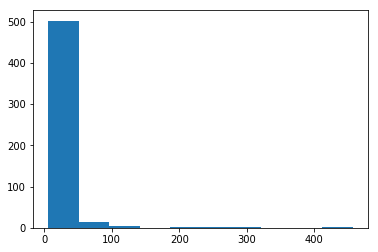

In [126]:
plt.hist(cnts)
plt.show()

In [129]:
cnts

array([  6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   

In [127]:
x = set()
for elem in texts:
    for w in elem:
        x.add(w)

In [128]:
len(x)

527

In [144]:
num_topics = 20

In [145]:
import os
import gensim
print("Got data")
    
print("Creating folder")
try:
    os.makedirs('models/standalone/gensim/morphy/thr0.5/{}/'.format(num_topics))
except OSError:
    pass

print("Starting to learn model")

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

print("Generate LDA model")
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=200)

print("Saving model")
ldamodel.save("models/standalone/gensim/morphy/thr0.5/{}/results.model".format(num_topics))

Got data
Creating folder
Starting to learn model
Generate LDA model
Saving model


In [148]:
import gensim
m = gensim.models.LdaModel.load("models/standalone/gensim/morphy/thr0.5/10/results.model")

In [149]:
for elem in m.print_topics(num_topics=10, num_words=20):
    print("Topic {}".format(elem[0]))
    print(elem[1])

Topic 0
0.182*"любит" + 0.037*"очень" + 0.022*"животных" + 0.015*"детей" + 0.011*"приятное" + 0.011*"людей" + 0.010*"занимается" + 0.010*"девушка" + 0.010*"волосы" + 0.010*"имеет" + 0.010*"музыку" + 0.010*"путешествовать" + 0.010*"интересное" + 0.009*"это" + 0.009*"старается" + 0.008*"время" + 0.008*"красивый" + 0.008*"умеет" + 0.007*"путешествия" + 0.007*"своей"
Topic 1
0.093*"человек" + 0.090*"очень" + 0.048*"это" + 0.044*"самый" + 0.040*"добрый" + 0.032*"красивый" + 0.031*"хороший" + 0.022*"лучший" + 0.019*"жизни" + 0.018*"любимый" + 0.016*"муж" + 0.013*"всем" + 0.013*"лет" + 0.012*"спокойный" + 0.012*"характер" + 0.010*"подарок" + 0.010*"дорогой" + 0.010*"трудную" + 0.010*"свете" + 0.010*"отец"
Topic 2
0.076*"добрый" + 0.052*"красивый" + 0.037*"веселый" + 0.036*"умный" + 0.029*"спокойный" + 0.029*"симпатичный" + 0.024*"общительный" + 0.021*"заботливый" + 0.020*"ответственный" + 0.017*"отзывчивый" + 0.015*"приятное" + 0.014*"интересный" + 0.014*"трудолюбивый" + 0.013*"любит" + 0.013

In [59]:
m = gensim.models.LdaModel.load('models/standalone/gensim/10/results.model')

In [60]:
for elem in m.print_topics(num_topics=10, num_words=10):
    print("Topic {}".format(elem[0]))
    print(elem[1])

Topic 0
0.002*"сказочная" + 0.002*"обворожительная" + 0.002*"обычный" + 0.002*"обаятельная" + 0.002*"радость" + 0.002*"женственная" + 0.002*"лучезарная" + 0.002*"любознательный" + 0.002*"нежная" + 0.002*"стройная"
Topic 1
0.004*"бывает" + 0.003*"взрывной" + 0.003*"доброжелательный" + 0.003*"строгий" + 0.003*"прекрасная" + 0.003*"стройная" + 0.002*"спортивный" + 0.002*"семью" + 0.002*"красиво" + 0.002*"внешность"
Topic 2
0.003*"своих" + 0.003*"папа" + 0.002*"подарки" + 0.002*"путешествовать" + 0.002*"интересная" + 0.002*"своим" + 0.002*"приятно" + 0.002*"роста" + 0.002*"стремится" + 0.002*"дарить"
Topic 3
0.003*"добродушный" + 0.003*"ситуации" + 0.003*"поддержать" + 0.003*"совет" + 0.003*"хорошее" + 0.002*"интересная" + 0.002*"целеустремленная" + 0.002*"готовить" + 0.002*"понимающая" + 0.002*"отличное"
Topic 4
0.003*"прийти" + 0.003*"друзей" + 0.003*"путешествия" + 0.003*"обычная" + 0.003*"любой" + 0.003*"обожает" + 0.002*"готов" + 0.002*"мужчина" + 0.002*"готовит" + 0.002*"нежная"
Topi

In [61]:
m = gensim.models.LdaModel.load('models/standalone/gensim/15/results.model')

In [62]:
for elem in m.print_topics(num_topics=15, num_words=10):
    print("Topic {}".format(elem[0]))
    print(elem[1])

Topic 0
0.004*"обычная" + 0.004*"целеустремленный" + 0.004*"разговорчивый" + 0.003*"окружающих" + 0.003*"смешной" + 0.002*"замечательный" + 0.002*"интересная" + 0.002*"вспыльчивая" + 0.002*"молодой" + 0.002*"харизматичный"
Topic 1
0.004*"среднего" + 0.003*"предпочитает" + 0.003*"роста" + 0.003*"жизнь" + 0.003*"цели" + 0.003*"жизнерадостная" + 0.003*"женщина" + 0.002*"прийти" + 0.002*"поддержать" + 0.002*"игры"
Topic 2
0.004*"гостеприимный" + 0.004*"практичный" + 0.004*"рассудительный" + 0.003*"уверенный" + 0.003*"оптимист" + 0.003*"довольно" + 0.003*"вежливый" + 0.003*"мудрый" + 0.003*"сложно" + 0.003*"семью"
Topic 3
0.004*"находит" + 0.004*"папа" + 0.004*"ласкавий" + 0.004*"друзей" + 0.003*"розумнийдобрий" + 0.003*"справедливый" + 0.003*"спорт" + 0.003*"мужественный" + 0.003*"аккуратный" + 0.003*"делает"
Topic 4
0.004*"ласковый" + 0.004*"нежный" + 0.003*"поможет" + 0.003*"страстный" + 0.003*"либо" + 0.003*"сдержанный" + 0.002*"харизма" + 0.002*"настоящий" + 0.002*"новому" + 0.002*"люб

In [63]:
m = gensim.models.LdaModel.load('models/standalone/gensim/20/results.model')

In [64]:
for elem in m.print_topics(num_topics=20, num_words=10):
    print("Topic {}".format(elem[0]))
    print(elem[1])

Topic 0
0.007*"которого" + 0.005*"приятно" + 0.005*"положиться" + 0.004*"парень" + 0.004*"игры" + 0.004*"поддержать" + 0.004*"увлекается" + 0.004*"своим" + 0.004*"весёлая" + 0.004*"внешность"
Topic 1
0.005*"язык" + 0.005*"общий" + 0.004*"находит" + 0.004*"общение" + 0.004*"бывает" + 0.004*"своим" + 0.004*"любознательный" + 0.003*"поддержать" + 0.003*"нежный" + 0.003*"семью"
Topic 2
0.006*"готов" + 0.004*"день" + 0.003*"своими" + 0.003*"доброжелательный" + 0.003*"готова" + 0.003*"дорогой" + 0.003*"самостоятельный" + 0.003*"делать" + 0.003*"рядом" + 0.002*"прийти"
Topic 3
0.008*"компанейский" + 0.007*"рассудительный" + 0.006*"ласкавий" + 0.006*"мудрый" + 0.005*"розумнийдобрий" + 0.005*"гостеприимный" + 0.005*"нежный" + 0.005*"обаятельный" + 0.005*"остроумный" + 0.005*"вежливый"
Topic 4
0.007*"терпеливый" + 0.005*"знаю" + 0.005*"поэтому" + 0.004*"разносторонний" + 0.004*"её" + 0.004*"своих" + 0.004*"описывать" + 0.003*"любознательный" + 0.003*"вещи" + 0.003*"поможет"
Topic 5
0.003*"сказоч

In [65]:
m = gensim.models.LdaModel.load('models/standalone/gensim/25/results.model')

In [66]:
for elem in m.print_topics(num_topics=25, num_words=10):
    print("Topic {}".format(elem[0]))
    print(elem[1])

Topic 0
0.005*"твоя" + 0.003*"красавица" + 0.003*"весело" + 0.003*"красавчик" + 0.003*"тебе" + 0.003*"жизнь" + 0.003*"нравятся" + 0.003*"женственная" + 0.002*"знакомы" + 0.002*"техникой"
Topic 1
0.007*"знаю" + 0.006*"терпеливый" + 0.004*"описывать" + 0.003*"готовит" + 0.003*"сексуальная" + 0.003*"упрямая" + 0.003*"фильмы" + 0.003*"вкусно" + 0.003*"ласковый" + 0.003*"друзьям"
Topic 2
0.006*"уверенный" + 0.004*"ситуации" + 0.004*"помогает" + 0.004*"ответственная" + 0.004*"путешествия" + 0.004*"небольшой" + 0.004*"теплое" + 0.004*"душа" + 0.004*"спокойная" + 0.004*"мужчина"
Topic 3
0.006*"терпеливая" + 0.004*"рассудительный" + 0.003*"находчивый" + 0.003*"душевный" + 0.003*"кататься" + 0.003*"остроумный" + 0.003*"сдержанный" + 0.003*"трудолюбивая" + 0.003*"слушать" + 0.003*"творческая"
Topic 4
0.005*"новому" + 0.004*"жизнь" + 0.004*"лучшая" + 0.003*"предпочитает" + 0.003*"целеустремленная" + 0.003*"стройная" + 0.003*"ласковая" + 0.003*"путешествовать" + 0.003*"сложно" + 0.003*"трудолюбивая

In [146]:
x = 5
xs = []
perplexities = []
for i in range(5):
    xs.append(x)
    m = gensim.models.LdaModel.load('models/standalone/gensim/morphy/thr0.5/{}/results.model'.format(x))
    x += 5
    # turn our tokenized documents into a id <-> term dictionary
    dictionary = m.id2word

    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]
    perplexities.append(m.log_perplexity(corpus))

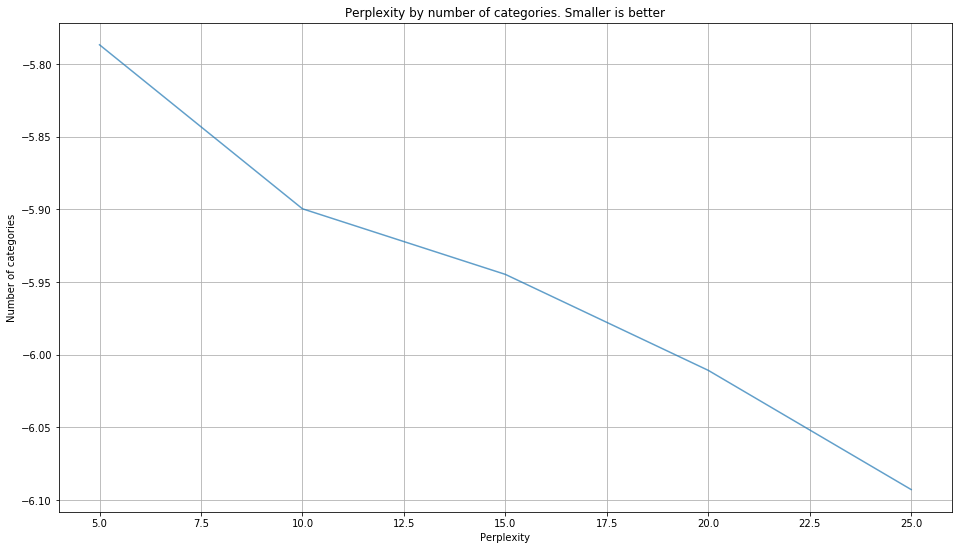

In [147]:
plt.figure(figsize=(16,9))

plt.plot(xs, perplexities, alpha=0.7)

plt.xlabel('Perplexity')
plt.ylabel('Number of categories')
plt.title('Perplexity by number of categories. Smaller is better')
plt.grid(True)
plt.show()

In [152]:
def return_thematic_features(model, doc_set):
    tokenizer = RegexpTokenizer(r'\w+')

    ru_stop = stopwords.words('russian')

    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()

    # list for tokenized documents in loop
    texts = []
    token_counts = {}
    sum_counts = 0
    docs_tokens = []
    # loop through document list
    for idx in range(len(doc_set)):
        # clean and tokenize document string
        raw = doc_set[idx].lower()
        tokens = tokenizer.tokenize(raw)
        # уборка частых слов уже после токенизации осознанна
        for elem in tokens:
            if elem in token_counts:
                token_counts[elem] += 1
            else:
                token_counts[elem] = 1
            sum_counts += 1
        docs_tokens.append(tokens)

    sorted_counts = sorted(token_counts.items(), key=operator.itemgetter(1))
    #sorted_counts.reverse()

    summator = 0
    sum_counts_fl = float(sum_counts)
    for idx in range(len(sorted_counts)):
        if summator / sum_counts_fl < float(0.4): # отсеиваемая доля
            summator += sorted_counts[idx][1]
            ru_stop.append(sorted_counts[idx][0])
        else:
            break 

    for idx in range(len(doc_set)):
        tokens = docs_tokens[idx]
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in ru_stop]
        # stem tokens
        #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

        # add tokens to list
        texts.append(stopped_tokens)
        
    normalized_texts = []
    for elem in texts:
        new = []
        for w in elem:
            p = morph.parse(w)[0]
            new.append(p.normal_form)
        normalized_texts.append(new)
        
    features = []
    for text in texts:
        answ = dict()
        for i in range(model.num_topics):
            answ[i] = 0.0
        dictionary = model.id2word
        pred = dictionary.doc2bow(text)
        for elem in model[pred]:
            answ[int(elem[0])] = float(elem[1])
        features.append(answ)
    return features
    

In [153]:
return_thematic_features(m, res)

[{0: 0.1075545996427536,
  1: 0.0,
  2: 0.46421241760253906,
  3: 0.0,
  4: 0.25351959466934204,
  5: 0.0,
  6: 0.12016039341688156,
  7: 0.0,
  8: 0.0,
  9: 0.0},
 {0: 0.014286963269114494,
  1: 0.014287954196333885,
  2: 0.014291168190538883,
  3: 0.8714002966880798,
  4: 0.0142882214859128,
  5: 0.014285893179476261,
  6: 0.014294217340648174,
  7: 0.01428599189966917,
  8: 0.014285882003605366,
  9: 0.014293446205556393},
 {0: 0.011111302301287651,
  1: 0.01111111044883728,
  2: 0.011111455038189888,
  3: 0.011111137457191944,
  4: 0.011111142113804817,
  5: 0.011111143045127392,
  6: 0.8999977111816406,
  7: 0.01111111044883728,
  8: 0.011111690662801266,
  9: 0.011112159118056297},
 {0: 0.720990002155304,
  1: 0.0,
  2: 0.0,
  3: 0.13811974227428436,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.0,
  8: 0.08703887462615967,
  9: 0.0},
 {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.8051475286483765,
  6: 0.14151263236999512,
  7: 0.0,
  8: 0.0,
  9: 0.0},
 {0: 0.7918640375137329,